***Nhóm 25*** </br>
Thành viên:
- Liêu Hải Lưu Danh - 22120459
- Đỗ Thanh Tùng - 22120408
- Phạm Ngọc Hoà - 22120109

# 1. Import Libraries

In [1]:
from pprint import pprint
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import f_oneway
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency


from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

import warnings
warnings.filterwarnings('ignore')

# 2. Read Dataset

+ Đây là tập dữ liệu để khảo sát vấn đề bị trầm cảm ở đối tượng là học sinh, sinh viên ở Ấn Độ.

In [2]:
df = pd.read_csv('student_depression.csv')
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [3]:
n_rows,n_cols=df.shape
print(f"Số lượng mẫu trong bộ dữ liệu này là: {n_rows}\n")

Số lượng mẫu trong bộ dữ liệu này là: 27901



In [4]:
pprint(f"Bộ dữ liệu có {n_cols} đặc trưng, bao gồm {df.columns.to_list()}")

("Bộ dữ liệu có 18 đặc trưng, bao gồm ['id', 'Gender', 'Age', 'City', "
 "'Profession', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study "
 "Satisfaction', 'Job Satisfaction', 'Sleep Duration', 'Dietary Habits', "
 "'Degree', 'Have you ever had suicidal thoughts ?', 'Work/Study Hours', "
 "'Financial Stress', 'Family History of Mental Illness', 'Depression']")


##### Mô tả cho từng đặc trưng:
+ ID: Chỉ số .
+ Gender: Giới tính (Male/Female).
+ Age: Tuổi.
+ City: Thành phố cư trú.
+ Profession: Nghề nghiệp.
+ Academic Pressure: Áp lực học tập. (giá trị từ 0 đến 5)
+ Work Pressure: Áp lực công việc. (giá trị từ 0 đến 5)
+ CGPA: Điểm trung bình tích lũy. (giá trị từ 0 đến 10)
+ Study Satisfaction: Sự hài lòng với việc học. (giá trị từ 0 đến 5)
+ Job Satisfaction: Sự hài lòng với công việc. (giá trị từ 0 đến 5)
+ Sleep Duration: Thời gian ngủ. (chia thành 4 nhóm)
+ Dietary Habits: Mức độ lành mạnh của thói quen ăn uống. (chia thanh 4 nhóm)
+ Degree: Bằng cấp.
+ Suicidal Thoughts: Ý nghĩ tự tử (Có/Không).
+ Work/Study Hours: Thời gian làm việc/học tập. 
+ Financial Stress: Căng thẳng tài chính. (giá trị từ 0 đến 5)
+ Family History of Mental Illness: Lịch sử bệnh tâm thần trong gia đình. (Có/Không)
+ Depression: Tình trạng trầm cảm. (Có/Không)

# 3. Preprocess Data


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [6]:
df.isna().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

+ Điền các giá trị NaN của cột Financial Stress bằng giá trị median của cột này

In [7]:
df['Financial Stress'] = df['Financial Stress'].fillna(df['Financial Stress'].median())

In [8]:
is_duplicate=df.duplicated().any()
print(f"Có các cột trùng lắp: {is_duplicate}")

Có các cột trùng lắp: False


# 4. EDA

## 1. Phân bổ nhân khẩu học và bệnh trầm cảm

- Câu hỏi: Phân bố các sinh viên theo độ tuổi, giới tính, liên hệ với bệnh trầm cảm như thế nào?
- Mục đích: Bệnh trầm cảm thường gặp phải ở những độ tuổi nào, nam hay nữ dễ bị trầm cảm hơn.

Trước tiên ta khảo sát độ tuổi của các đối tượng trong dữ liệu

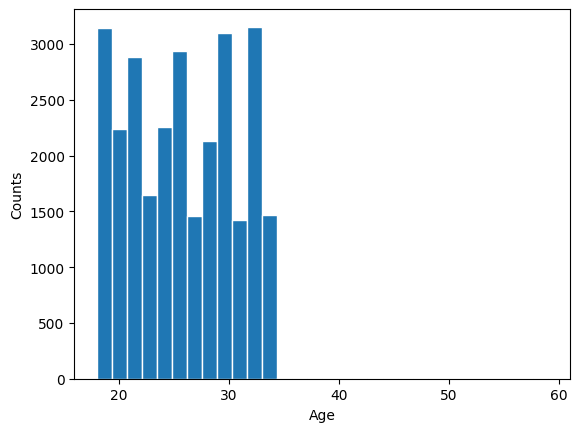

In [9]:
plt.hist(df['Age'],edgecolor='white',bins=30)
plt.xlabel('Age')
plt.ylabel('Counts');

Một cách trực quan, độ tuổi của đối tượng khảo sát sẽ nằm trong khoảng 18-35 tuổi  
Để dễ dàng khảo sát ý nghĩa của dữ liệu này hơn, ta sẽ chia tuổi thành các nhóm dựa vào tứ phân vị

In [10]:
qs=[.25,.5,.75]
for i,q in enumerate(qs):
    k=df['Age'].quantile(q)
    print(f'Tứ phân vị thứ {i+1}: {k}')

Tứ phân vị thứ 1: 21.0
Tứ phân vị thứ 2: 25.0
Tứ phân vị thứ 3: 30.0


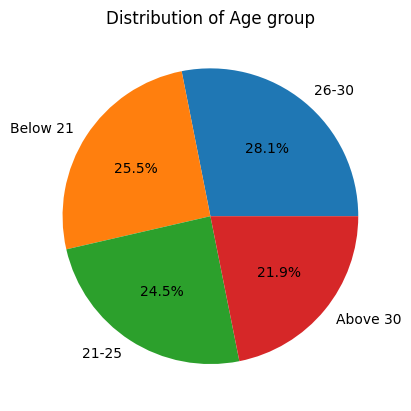

In [11]:
age_labels=['Below 21','21-25','26-30','Above 30']
df1=df[['Age','Gender','City','Depression']]

df1['Age group']=pd.cut(df['Age'],bins=[0,21,25,30,100],
           labels=age_labels)
df1['Age group'].value_counts()
plt.pie(df1['Age group'].value_counts(),
        labels=df1['Age group'].value_counts().index,
        autopct='%1.1f%%');

plt.title('Distribution of Age group');

Để so sánh hệ số tương quan giữa các đặc trưng: Age, Gender, Depression, ta sẽ chuyển các giá trị thành object thành số

In [12]:
df1['Age group']=pd.cut(df['Age'],bins=[0,21,25,30,100],
           labels=[1,2,3,4])
df1['Age group']=df1['Age group'].astype(np.uint8)

df1['Gender']=pd.get_dummies(df1['Gender'], drop_first=True)

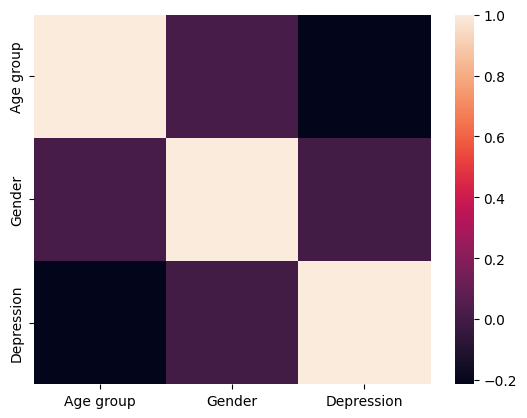

In [13]:
sns.heatmap(df1[['Age group','Gender','Depression']].corr());

Dựa vào heatmap, ta có thể nhận xét rằng việc bị trầm cảm có mối liên hệ tuyến tính với độ tuổi. Cụ thể hơn, hệ số tương quan là khoảng -0.2, thể hiện phần nào rằng tuổi càng cao thì càng ít bị trầm cảm hơn.  
  
Bên cạnh đó giới tính không hề có mối liên hệ tuyến tính nào với các thuộc tính được sử dụng khác.

##### Plot đồ thị thể hiện tỉ lệ bị trầm cảm dựa trên các nhóm tuổi

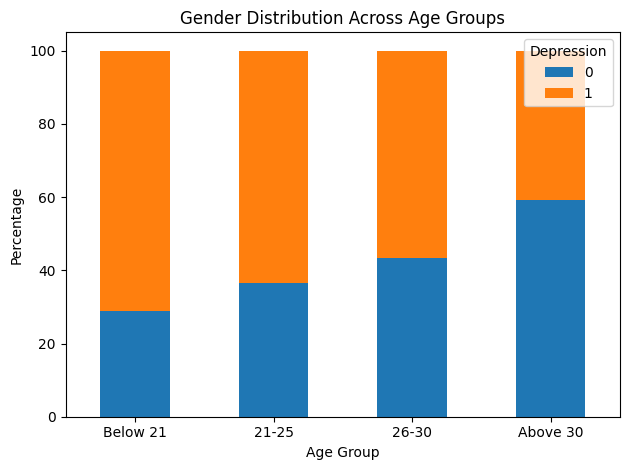

In [14]:
age_gender_counts = df1.groupby(['Age group', 'Depression']).size().unstack()
age_gender_percentages = age_gender_counts.div(age_gender_counts.sum(axis=1), axis=0) * 100
# Plotting
age_gender_percentages.plot(kind='bar', stacked=True)  # Change to stacked=True for a stacked bar chart

plt.title('Gender Distribution Across Age Groups')
plt.xlabel('Age Group')

plt.ylabel('Percentage')
plt.xticks(rotation=0,labels=age_labels,ticks=range(len(age_labels)))  # Rotate x-axis labels if necessary
plt.legend(title='Depression')
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

Đồ thị này biểu thị rõ ràng hơn nhận định tuổi càng cao thì tỉ lệ bị trầm cảm ít hơn.

##### Ý nghĩa: 
Tuy các tập dữ liệu có đối tượng khảo sát là học sinh, sinh viên, nhưng nhóm tuổi càng thấp thì càng có dễ bị trầm cảm hơn là nhóm tuổi cao. Điều này có thể là do họ chưa trưởng thành trong cách học và sinh hoạt trong đời sống hằng ngày chưa điều độ dẫn đến tâm trí chưa ổn định

## 2. Liên hệ giữa nhân khẩu học và kết quả học tập

- Câu hỏi: Độ tuổi, giới tính có mối liên hệ gì với CGPA không?
- Mục đích: Xem xét liệu các đặc điểm nhân khẩu học có tương quan với hiệu suất học tập hay không.

In [15]:
age_labels=['Below 21','21-25','26-30','Above 30']
df2=df[['Age','Gender','City','CGPA']]
df2['Age group']=pd.cut(df['Age'],bins=[0,21,25,30,100],
           labels=[1,2,3,4])
df2['Age group']=df2['Age group'].astype(np.uint8)
df2['Gender']=pd.get_dummies(df2['Gender'], drop_first=True)
df2[['Age group','Gender','CGPA']].corr()

,Age group,Gender,CGPA
Age group,1.000000,0.014945,0.000331
Gender,0.014945,1.000000,0.036040
CGPA,0.000331,0.036040,1.000000


Các hệ số tương quan đều rất thấp nên không thể kết luận là có mối liên hệ tương quan giữa các biến trên  
Ta sẽ thử thống kê mô tả CGPA dựa trên Age group


In [16]:
stats=df2.groupby(['Age group'])['CGPA'].agg(['mean', 'std', 'count'])
stats

,mean,std,count
Age group,,,
1,7.626803,1.429826,7110
2,7.693774,1.453008,6847
3,7.668121,1.494395,7845
4,7.632515,1.505554,6099


Thống kê mô tả CGPA dựa trên điểm số: 

In [17]:
stats=df2.groupby(['Gender'])['CGPA'].agg(['mean', 'std', 'count'])
stats

,mean,std,count
Gender,,,
False,7.596645,1.487053,12354
True,7.703352,1.455906,15547


Ta thấy có sự khác biệt về điểm số giữa học sinh, sinh viên nữ và nam. Để kiểm định vấn đề này, ta sẽ sử dụng t-test.

In [18]:
males= df2[df2['Gender']==1]['CGPA']
females= df2[df2['Gender']==0]['CGPA']
t_stat, p_value = ttest_ind(males, females, alternative='greater')
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 6.023637126208623
P-value: 8.633674457682684e-10


Do giá trị p-value<0.05 nên ta có thể kết luận là điểm trung bình tích lũy của học sinh, sinh viên nam cao hơn nữ

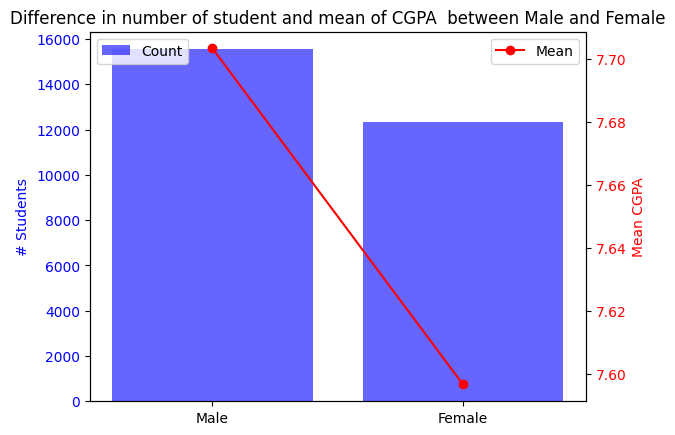

In [19]:
# Create a figure with subplots
fig, ax1 = plt.subplots()
labels=['Male','Female']
counts= stats['count'][::-1]
means= stats['mean'][::-1]
# Count plot
ax1.bar(labels, counts, color='b', alpha=0.6, label='Count')
ax1.set_ylabel('# Students', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for the mean
ax2 = ax1.twinx()
ax2.plot(labels, means, color='r', marker='o', label='Mean')
ax2.set_ylabel('Mean CGPA', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Title and legend
plt.title('Difference in number of student and mean of CGPA  between Male and Female')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()

##### Ý nghĩa:
Có thể lí giải điều này là đất nước Ấn Độ vẫn còn các định kiến và bất bình đẳng xã hội trong giáo dục cho 2 phái nam và nữ. Ví dụ tỉ lệ nhập học của Nam nhiều hơn, điều này cũng được thể hiện trong bảng thống ke mô tả trên, hay sự khác biệt điểm số giữa 2 phái, tuy là khía cạnh này thì ít hơn. 

Dựa vào dữ liệu thống kê và biểu đồ, ta có thể thấy không có sự khác biệt về CGPA giữa các nhóm tuổi

## 3. Thời lượng ngủ và các yếu tố liên quan

- Câu hỏi: Thời lượng ngủ trung bình có liên quan như thế nào với áp lực học tập (Academic Pressure), áp lực công việc (Work Pressure), và CGPA?
- Mục đích: Tìm hiểu xem việc nghỉ ngơi có ảnh hưởng đến áp lực và kết quả học tập hay không.

In [20]:
print('Dữ liệu cột Work Pressure:\n',df['Work Pressure'].value_counts())
print('Dữ liệu cột Job Satisfaction:\n',df['Job Satisfaction'].value_counts())

Dữ liệu cột Work Pressure:
 Work Pressure
0.0    27898
5.0        2
2.0        1
Name: count, dtype: int64
Dữ liệu cột Job Satisfaction:
 Job Satisfaction
0.0    27893
2.0        3
4.0        2
1.0        2
3.0        1
Name: count, dtype: int64


Hơn 99% giá trị của Work Pressure = 0 làm cho việc kết quả khảo sát ý nghĩa của cột này sẽ không đáng tin cậy nên chúng em không khảo sát trên Work Pressure.  
Khi đó câu hỏi còn lại là "Thời lượng ngủ trung bình có liên quan như thế nào với áp lực học tập (Academic Pressure), và CGPA?"

In [21]:
df['Sleep Duration'].value_counts()

Sleep Duration
Less than 5 hours    8310
7-8 hours            7346
5-6 hours            6183
More than 8 hours    6044
Others                 18
Name: count, dtype: int64

Dữ liệu của lớp Others rất ít so với các lớp còn lại khiến cho kết luận đưa ra trên lớp này sẽ không đáng tin cậy. Do đó, chúng em sẽ chỉ khảo sát trên 4 lớp còn lại

In [22]:
df3= df[df['Sleep Duration']!='Others']

#### Xét mối liên hệ giữa thời lượng ngủ và áp lực học tập


In [23]:
stats=df3.groupby(['Sleep Duration'])['Academic Pressure'].agg(['mean','std','count'])
stats.loc[['Less than 5 hours','5-6 hours','7-8 hours','More than 8 hours']]

,mean,std,count
Sleep Duration,,,
Less than 5 hours,3.228520,1.380409,8310
5-6 hours,3.120653,1.368878,6183
7-8 hours,3.135584,1.367271,7346
More than 8 hours,3.048974,1.407146,6044


Có thể nhận xét rằng xu hướng chung là ngủ càng nhiều thì áp lực học tập giảm xuống ít.   

Áp lực giảm mạnh, 0.1, từ nhóm 1 xuống nhóm 2, nhóm 2 và nhóm 3 gần bằng nhau và giảm mạnh lần nữa, 0.09, khi qua nhóm 4.  

Sự biến đổi của nhóm 1 và nhóm 4 khá rõ rệt nên ta sẽ thử kiểm định liệu trung bình của nhóm thứ 2 lại thấp hơn nhóm thứ 3 thật không

In [24]:
d2=df3[df3['Sleep Duration']=='5-6 hours']['Academic Pressure']
d3=df3[df3['Sleep Duration']=='7-8 hours']['Academic Pressure']
t_stat, p_value = ttest_ind(d2, d3, alternative='greater')
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: -0.63238464108118
P-value: 0.736426871969069


p-value không nhỏ hơn 0.05 nên không thể bác bỏ giả thuyết giá trị trung bình của 2 nhóm là bằng nhau.

Vậy khẳng định xu hướng chung là ngủ nhiều thì áp lực học tập sẽ hầu như là giảm.

In [25]:
df3['Sleep Duration'].unique()

array(['5-6 hours', 'Less than 5 hours', '7-8 hours', 'More than 8 hours'],
      dtype=object)

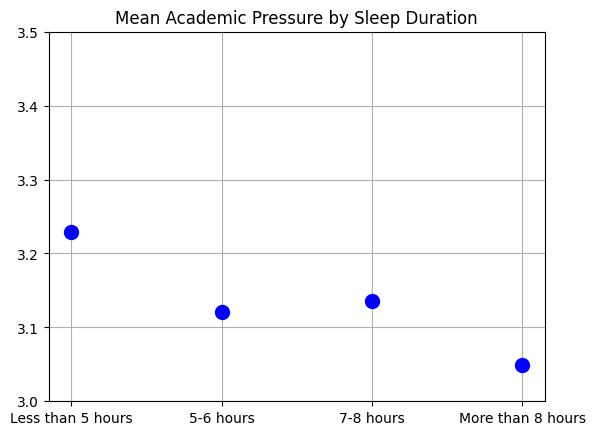

In [26]:
labels=['Less than 5 hours','5-6 hours','7-8 hours','More than 8 hours']
means = stats.loc[labels]['mean']

# Create a dot plot
plt.plot(labels, means, 'o', color='blue', markersize=10)
plt.title('Mean Academic Pressure by Sleep Duration')
plt.ylim(3,3.5)  
plt.grid()

plt.show()

#### Xét mối liên hệ giữa thời lượng giấc ngủ và điểm số

In [27]:
stats=df3.groupby(['Sleep Duration'])['CGPA'].agg(['mean','std','count'])
stats.loc[['Less than 5 hours','5-6 hours','7-8 hours','More than 8 hours']]

,mean,std,count
Sleep Duration,,,
Less than 5 hours,7.640473,1.463252,8310
5-6 hours,7.688737,1.448295,6183
7-8 hours,7.686127,1.483631,7346
More than 8 hours,7.607902,1.486312,6044


Có thể nhận xét rằng xu hướng chung là ngủ ít quá hoặc nhiều quá thì điểm CGPA sẽ thấp hơn so với những người ngủ đủ.   

Điểm tăng 0.04, từ nhóm 1 xuống nhóm 2, nhóm 2 và nhóm 3 gần bằng nhau và giảm 0.08, khi qua nhóm 4.  

Sự cách biệt giữa nhóm 2 và 3 với nhóm 1 và 4 khá rõ rệt nên ta sẽ chỉ thử kiểm định xem nhóm 2 hay nhóm 3 có điểm CGPA cao hơn

In [28]:
d2=df3[df3['Sleep Duration']=='5-6 hours']['CGPA']
d3=df3[df3['Sleep Duration']=='7-8 hours']['CGPA']
t_stat, p_value = ttest_ind(d2, d3, alternative='greater')
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 0.10303420052760112
P-value: 0.4589686773198591


Do giá trị p-value rất lớn nên ta không thể bác bỏ giả thuyết rằng CGPA của 2 nhóm này bằng nhau.

Vậy có thể khẳng định rằng nếu ngủ từ khoảng 5 tới 8 tiếng một ngày thì CGPA sẽ tốt nhất. Ngủ nhiều hơn hoặc ít hơn thời gian này đều sẽ làm giảm CGPA

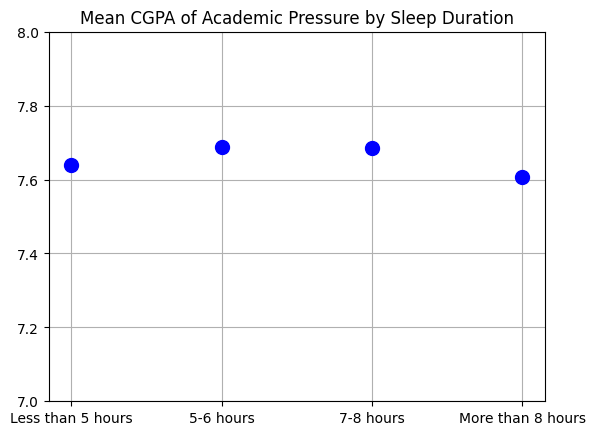

In [29]:
labels=['Less than 5 hours','5-6 hours','7-8 hours','More than 8 hours']
means = stats.loc[labels]['mean']

# Create a dot plot
plt.plot(labels, means, 'o', color='blue', markersize=10)
plt.title('Mean CGPA of Academic Pressure by Sleep Duration')
plt.ylim(7,8)
plt.grid()

plt.show()

##### Ý nghĩa:
+ Học sinh, sinh viên đạt CGPA tốt nhất khi ngủ đủ giấc từ 5-8 tiếng.
+ Học sinh, sinh viên càng ngủ nhiều tinh thần càng khuây khỏa, dẫn đến áp lực học tập càng giảm

## 4. Bằng cấp có ảnh hưởng tới thói quen ăn uống, thời gian làm việc không 

In [30]:
df.groupby(['Degree'])['Dietary Habits'].apply(list).index

Index(['B.Arch', 'B.Com', 'B.Ed', 'B.Pharm', 'B.Tech', 'BA', 'BBA', 'BCA',
       'BE', 'BHM', 'BSc', 'Class 12', 'LLB', 'LLM', 'M.Com', 'M.Ed',
       'M.Pharm', 'M.Tech', 'MA', 'MBA', 'MBBS', 'MCA', 'MD', 'ME', 'MHM',
       'MSc', 'Others', 'PhD'],
      dtype='object', name='Degree')

Dễ thấy có 4 nhóm trong các dạng Degree :học sinh, cử nhân, thạc sĩ, tiến sĩ, khi đó ta sẽ tách ra và phân tích

In [31]:
df_copy=pd.DataFrame(df)
degree_mapping = {
    'Class 12': 'Học sinh',
    'B.Arch': 'Cử nhân', 'B.Com': 'Cử nhân', 'B.Ed': 'Cử nhân', 'B.Pharm': 'Cử nhân', 'B.Tech': 'Cử nhân', 'BA': 'Cử nhân', 'BBA': 'Cử nhân', 'BCA': 'Cử nhân', 'BE': 'Cử nhân', 'BHM': 'Cử nhân', 'BSc': 'Cử nhân',
    'M.Com': 'Thạc sĩ', 'M.Ed': 'Thạc sĩ', 'M.Pharm': 'Thạc sĩ', 'M.Tech': 'Thạc sĩ', 'MA': 'Thạc sĩ', 'MBA': 'Thạc sĩ', 'MCA': 'Thạc sĩ', 'MD': 'Thạc sĩ', 'ME': 'Thạc sĩ', 'MHM': 'Thạc sĩ', 'MSc': 'Thạc sĩ',
    'PhD': 'Tiến sĩ',
    'LLB': 'Cử nhân', 'LLM': 'Thạc sĩ'
}
df_copy['Degree_Group'] = df_copy['Degree'].map(degree_mapping)
grouped_data = df_copy.groupby('Degree_Group')['Dietary Habits'].apply(list)
print(grouped_data)

Degree_Group
Cử nhân     [Healthy, Moderate, Healthy, Moderate, Healthy...
Học sinh    [Unhealthy, Moderate, Unhealthy, Moderate, Hea...
Thạc sĩ     [Moderate, Moderate, Moderate, Unhealthy, Mode...
Tiến sĩ     [Healthy, Healthy, Healthy, Moderate, Moderate...
Name: Dietary Habits, dtype: object


In [32]:
dietary_mapping = {'Healthy': 3, 'Moderate': 2, 'Unhealthy': 1}  #quy đổi ra điểm, điểm càng cao thì có thể xem như Dietary Habits càng tốt cho sức khỏekhỏe
df_copy['Dietary_Habits_Mapped'] = df_copy['Dietary Habits'].map(dietary_mapping)
grouped_stats = df_copy.groupby('Degree_Group')['Dietary_Habits_Mapped'].agg(['mean', 'std'])
print(grouped_stats)

                  mean       std
Degree_Group                    
Cử nhân       1.904291  0.790114
Học sinh      1.857871  0.798073
Thạc sĩ       1.933375  0.804676
Tiến sĩ       1.892720  0.814919


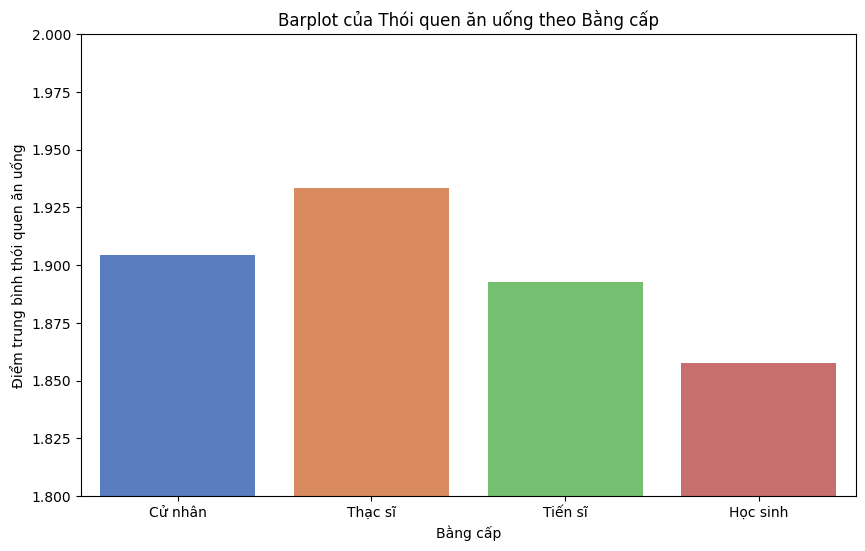

In [33]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Degree_Group', y='Dietary_Habits_Mapped', data=df_copy, estimator='mean', ci=None, palette='muted')
plt.title('Barplot của Thói quen ăn uống theo Bằng cấp')
plt.xlabel('Bằng cấp')
plt.ylim(1.8,2)
plt.ylabel('Điểm trung bình thói quen ăn uống')
plt.show()

Nhận xét về kết quả:  
- Nhóm Thạc sĩ có giá trị trung bình cao nhất, điều này có thể gợi ý rằng thói quen ăn uống của các nhóm Thạc sĩ và Cử nhân có xu hướng tốt hơn so với các nhóm Học sinh và Tiến sĩ.  
- Tiến sĩ có độ lệch chuẩn cao nhất (0.814919), cho thấy sự đa dạng lớn hơn trong thói quen ăn uống.  
- Cử nhân và Thạc sĩ có độ lệch chuẩn tương đối thấp hơn (0.790114 và 0.804676), chỉ ra rằng sự đa dạng trong thói quen ăn uống là khá đồng đều trong các nhóm này.  
Học sinh có độ lệch chuẩn thấp nhất (0.798073), cho thấy sự đồng nhất trong thói quen ăn uống của nhóm này.  

Kết luận:  
- Các nhóm có độ lệch chuẩn cao như Tiến sĩ có thể phản ánh rằng thói quen ăn uống của nhóm này có sự phân hóa rõ rệt, có thể do yếu tố công việc, thời gian và căng thẳng trong học tập hoặc nghề nghiệp.  
- Các nhóm như Cử nhân, Thạc sĩ, có độ lệch chuẩn thấp hơn có thể phản ánh sự đồng điệu trong chế độ ăn uống.  

In [34]:
from scipy import stats
group_1 = df_copy[df_copy['Degree_Group'] == 'Cử nhân']['Dietary_Habits_Mapped']
group_2 = df_copy[df_copy['Degree_Group'] == 'Tiến sĩ']['Dietary_Habits_Mapped']
group_3 = df_copy[df_copy['Degree_Group'] == 'Học sinh']['Dietary_Habits_Mapped']
group_4 = df_copy[df_copy['Degree_Group'] == 'Thạc sĩ']['Dietary_Habits_Mapped']

group_1_clean = group_1.dropna()
group_2_clean = group_2.dropna()
group_3_clean = group_3.dropna()
group_4_clean = group_4.dropna()

t_stat, p_value_ttest = stats.ttest_ind(group_1_clean, group_2_clean)
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value_ttest}')

t_stat, p_value_ttest = stats.ttest_ind(group_2_clean, group_3_clean)
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value_ttest}')

t_stat, p_value_ttest = stats.ttest_ind(group_3_clean, group_4_clean)
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value_ttest}')

t_stat, p_value_ttest = stats.ttest_ind(group_1_clean, group_3_clean)
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value_ttest}')

t_stat, p_value_ttest = stats.ttest_ind(group_2_clean, group_4_clean)
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value_ttest}')

t_stat, p_value_ttest = stats.ttest_ind(group_1_clean, group_4_clean)
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value_ttest}')

T-statistic: 0.3274555642541373
P-value: 0.7433285583339297
T-statistic: 0.955792066191745
P-value: 0.3392123092383901
T-statistic: -5.52312391597568
P-value: 3.38959659924212e-08
T-statistic: 3.7513620184930816
P-value: 0.0001764071770975375
T-statistic: -1.117208812179462
P-value: 0.26393683658222516
T-statistic: -2.550578037198615
P-value: 0.010761628956222355


### Kết quả phân tích so sánh nhóm  

Dễ thấy có ba kết quả có \( P \)-value < 0.05  

---

#### So sánh Học sinh và Thạc sĩ  
- **T-statistic**: -5.523  
- **P-value**: \( 3.39 \times 10^{-8} \) (gần bằng 0)  

**Kết luận**:  
Có sự khác biệt rất đáng kể giữa thói quen ăn uống của nhóm **Học sinh** và **Thạc sĩ** (\( P \)-value < 0.001).  
Giá trị âm của T-statistic cho thấy **Học sinh** có trung bình thấp hơn **Thạc sĩ**.  

---

#### So sánh Cử nhân và Học sinh  
- **T-statistic**: 3.751  
- **P-value**: 0.000176  

**Kết luận**:  
Có sự khác biệt rất đáng kể giữa thói quen ăn uống của nhóm **Cử nhân** và **Học sinh** (\( P \)-value < 0.001).  
Giá trị dương của T-statistic cho thấy **Cử nhân** có trung bình cao hơn **Học sinh**.  

---

#### So sánh Tiến sĩ và Thạc sĩ  
- **T-statistic**: -2.551  
- **P-value**: 0.0108  

**Kết luận**:  
Có sự khác biệt đáng kể giữa thói quen ăn uống của nhóm **Tiến sĩ** và **Thạc sĩ** (\( P \)-value < 0.05).  
Giá trị âm của T-statistic cho thấy **Tiến sĩ** có trung bình thấp hơn **Thạc sĩ**.  

---

### Nhận xét:  
- Nhóm **Học sinh** có sự khác biệt đáng kể trong thói quen ăn uống so với các nhóm còn lại, đặc biệt thấp hơn rõ rệt so với **Thạc sĩ**.  
- Nhóm **Cử nhân** và **Tiến sĩ** không có sự khác biệt đáng kể.  
- **Cử nhân** có xu hướng thấp hơn **Thạc sĩ**, nhưng khác biệt này không rõ rệt như giữa **Học sinh** và **Thạc sĩ**.  


## 5. Tương quan giữa thời gian làm việc/học tập và sức khỏe tinh thần  
- Câu hỏi: Thời gian làm việc/học tập (Work/Study Hours) có ảnh hưởng như thế nào đến việc xuất hiện suy nghĩ tự tử (Have you ever had suicidal thoughts?) hoặc tình trạng trầm cảm (Depression)?  
- Mục đích: Hiểu rõ tác động của thời gian học tập hoặc làm việc kéo dài lên sức khỏe tinh thần của sinh viên.  

In [35]:
df['Suicidal_Thoughts'] = df['Have you ever had suicidal thoughts ?'].map({'Yes': 1, 'No': 0})
df = df.dropna(subset=['Work/Study Hours', 'Suicidal_Thoughts'])
mean_hours = df.groupby('Suicidal_Thoughts')['Work/Study Hours'].mean()
std_hours = df.groupby('Suicidal_Thoughts')['Work/Study Hours'].std()
result = pd.DataFrame({
    'Mean Work/Study Hours': mean_hours,
    'Std Work/Study Hours': std_hours
})
result.index = result.index.map({1: 'Yes', 0: 'No'}) 
result

,Mean Work/Study Hours,Std Work/Study Hours
Suicidal_Thoughts,,
No,6.566520,3.835676
Yes,7.499604,3.587100


#### 1. Trung bình và Độ lệch chuẩn  

Trung bình thời gian học tập/làm việc:  
Nhóm không có suy nghĩ tự tử (No): Trung bình là 6.57 giờ.  
Nhóm có suy nghĩ tự tử (Yes): Trung bình là 7.5 giờ.  
Độ lệch chuẩn thời gian học tập/làm việc:  
Nhóm No: Độ lệch chuẩn là 3.84.  
Nhóm Yes: Độ lệch chuẩn là 3.59.  

#### Ý nghĩa:  

Nhóm có suy nghĩ tự tử dành nhiều thời gian học tập/làm việc hơn nhóm không có suy nghĩ tự tử.  
Độ lệch chuẩn ở cả hai nhóm là tương đối gần nhau, cho thấy phân phối của thời gian học tập/làm việc khá đồng nhất trong mỗi nhóm.  


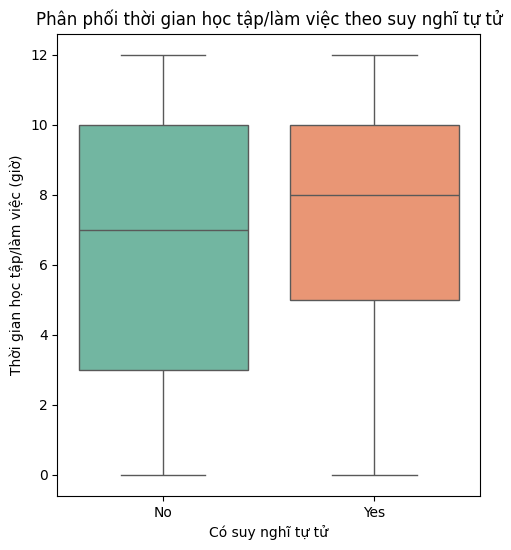

In [36]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Suicidal_Thoughts', y='Work/Study Hours', data=df, palette="Set2")
plt.xticks([0, 1], ['No', 'Yes'])
plt.title("Phân phối thời gian học tập/làm việc theo suy nghĩ tự tử")
plt.xlabel("Có suy nghĩ tự tử")
plt.ylabel("Thời gian học tập/làm việc (giờ)")
plt.show()

In [37]:
df.drop(columns=['Suicidal_Thoughts'], inplace=True)

#### 2. Biểu đồ minh họa  

##### Boxplot:  

Nhóm có suy nghĩ tự tử (Yes) có thời gian học tập/làm việc tập trung cao hơn so với nhóm không có suy nghĩ tự tử.  
Phân phối thời gian học tập/làm việc trong nhóm có suy nghĩ tự tử rộng hơn ở mức trung bình cao hơn.  

##### Kết luận:  

Có mối liên hệ dương giữa thời gian học tập/làm việc và suy nghĩ tự tử. Cụ thể:  
Nhóm có suy nghĩ tự tử dành nhiều thời gian học tập/làm việc hơn so với nhóm không có suy nghĩ tự tử.  
Kết quả từ kiểm định thống kê (t-test và ANOVA) cho thấy sự khác biệt này là có ý nghĩa thống kê.  
Thời gian học tập/làm việc có thể là một yếu tố góp phần gây căng thẳng và ảnh hưởng đến sức khỏe tinh thần, dẫn đến suy nghĩ tiêu cực ở nhóm đối tượng.  

## 6. Thói quen ăn uống và sức khỏe tinh thần:
- Câu hỏi: Thói quen ăn uống (Dietary Habits) có liên quan đến sự hài lòng trong học tập như thế nào?  
- Mục đích: Xem dinh dưỡng có đóng vai trò hỗ trợ trạng thái tinh thần và chất lượng cuộc sống hay không.

In [38]:
data6 = df.groupby(['Dietary Habits'])['Study Satisfaction'].apply(list)
stats_res = data6.apply(lambda x: pd.Series({
    'mean': pd.Series(x).mean(),
    'std': pd.Series(x).std(),
    'count': len(x)
}))
print(stats_res.index)
print(stats_res)

Index(['Healthy', 'Moderate', 'Others', 'Unhealthy'], dtype='object', name='Dietary Habits')
                    mean       std    count
Dietary Habits                             
Healthy         2.998954  1.361179   7651.0
Moderate        2.919968  1.377909   9921.0
Others          3.416667  1.443376     12.0
Unhealthy       2.925366  1.343653  10317.0


- Healthy (mean=2.999) có mức độ hài lòng cao hơn một chút so với Moderate (2.920) và Unhealthy (2.925), nhưng sự khác biệt rất nhỏ.
- Others (mean=3.417) có giá trị trung bình hài lòng cao hơn so với các nhóm khác, tuy nhiên số lượng quan sát (count = 12) là rất nhỏ, dẫn đến kết quả có thể không đại diện.
- Độ lệch chuẩn (std) dao động từ khoảng 1.34 đến 1.44, cho thấy mức độ phân tán giữa các nhóm là tương đối giống nhau.

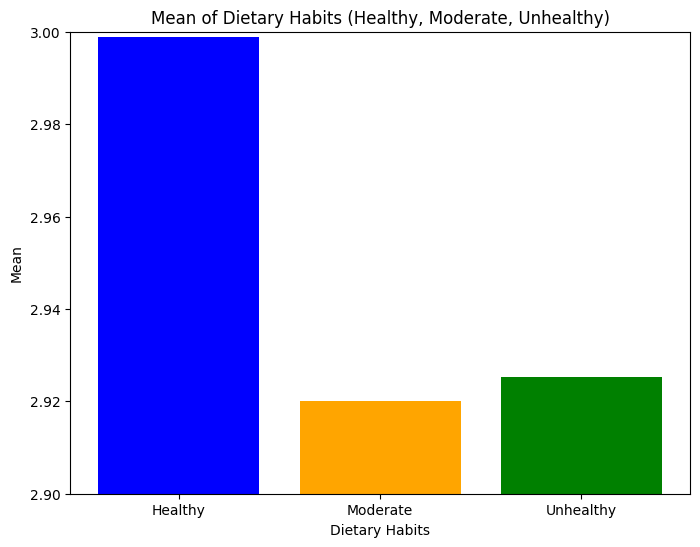

In [39]:
stats_filtered = stats_res.drop('Others') #bỏ other vì other không có nhiều ý nghĩa trong việc so sánh trung bìnhbình
plt.figure(figsize=(8, 6))
plt.bar(stats_filtered.index, stats_filtered['mean'], color=['blue', 'orange', 'green'])
plt.title('Mean of Dietary Habits (Healthy, Moderate, Unhealthy)')
plt.xlabel('Dietary Habits')
plt.ylabel('Mean')
plt.ylim(2.9,3)
plt.show()

In [40]:
data6.pop('Others')
anova_data = [x for x in data6]
anova_result = f_oneway(*anova_data)
print("\nP-value (ANOVA):", anova_result.pvalue)


P-value (ANOVA): 0.00015838914405905705


- P-value = 0.0001515, nhỏ hơn mức ý nghĩa thông thường (0.05).
Điều này cho thấy rằng có sự khác biệt có ý nghĩa thống kê giữa trung bình mức độ hài lòng của ít nhất một nhóm Dietary Habits (Nhìn vào biểu đồ trên thì có lẽ nhóm đó là healthy)

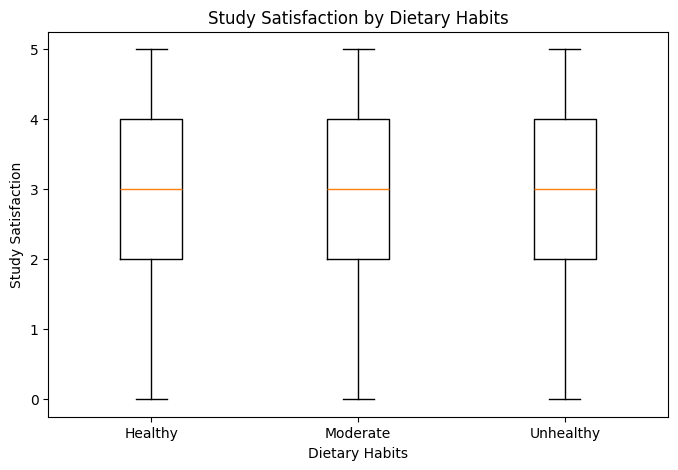

In [41]:
plt.figure(figsize=(8, 5))
plt.boxplot(data6, labels=data6.index)  
plt.title('Study Satisfaction by Dietary Habits')
plt.xlabel('Dietary Habits')
plt.ylabel('Study Satisfaction')
plt.show()

### Nhận xét: 
- Mức độ hài lòng (Study Satisfaction) ở cả ba nhóm này khá tương đồng.  
- Median (giá trị trung vị) của ba nhóm đều khoảng 3, cho thấy mức độ hài lòng trung bình.  
- Khoảng giá trị (interquartile range - IQR) cũng tương đối giống nhau.

## 7. Mối liên hệ giữa áp lực và điểm số

- Câu hỏi: Sinh viên chịu áp lực học tập cao có CGPA(Cumulative Grade Point Average) khác biệt so với những sinh viên áp lực thấp không?
- Mục đích: Xem liệu áp lực cao có tương quan với hiệu suất học tập tốt hơn hoặc kém hơn.

In [42]:
stats = df.groupby('Academic Pressure')['CGPA'].agg(['mean', 'std', 'count'])
stats

,mean,std,count
Academic Pressure,,,
0.0,2.173333,3.375363,9
1.0,7.724066,1.467177,4801
2.0,7.699495,1.496335,4178
3.0,7.646876,1.454031,7462
4.0,7.616541,1.455500,5155
5.0,7.626653,1.467877,6296


Thống kê:
- Mean:
    - Academic Pressure = 0.0: CGPA rất thấp (2.17).
    - Academic Pressure từ 1.0 đến 5.0: CGPA trung bình duy trì ở khoảng 7.62 đến 7.72.
- Std:
    - Academic Pressure = 0.0 có độ lệch chuẩn rất cao (3.37), cho thấy điểm CGPA của nhóm này rất không đồng đều.
    - Academic Pressure từ 1.0 đến 5.0 có độ lệch chuẩn thấp (1.45 -> 1.49), tức là là điểm CGPA của các nhóm này ổn định hơn.

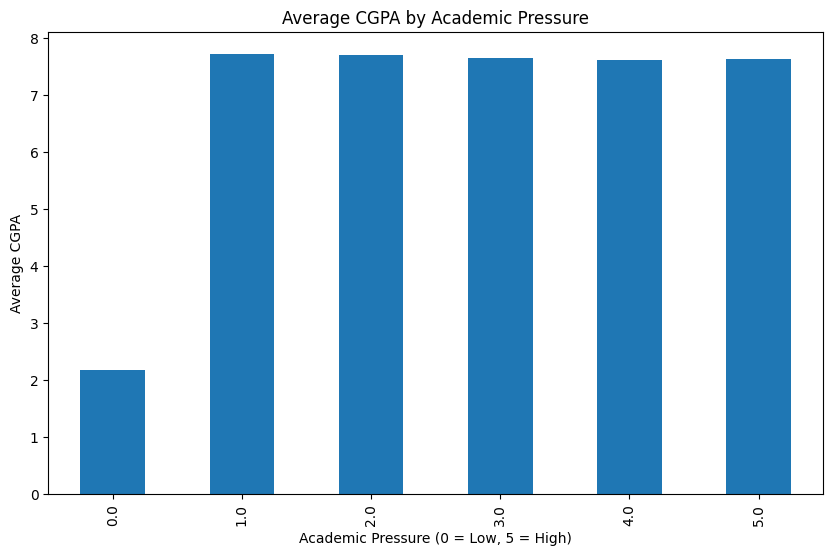

In [43]:
plt.figure(figsize=(10, 6))
stats['mean'].plot(kind='bar', title='Average CGPA by Academic Pressure')
plt.xlabel('Academic Pressure (0 = Low, 5 = High)')
plt.ylabel('Average CGPA')
plt.show()

- Nhìn vào kết quả thống kê trên ta thấy được điểm trung bình tích luỹ(CGPA) tăng đáng kể khi áp lực học tập(Academic Pressure) tăng từ **0 lên 1**. Sau đó thì trung bình tích luỹ duy trì khá ổn định (7.6 -> 7.7) với mức áp lực từ 1 đến 5. Tuy nhiên từ **1 đến 4** có dấu hiệu suy giảm CGPA

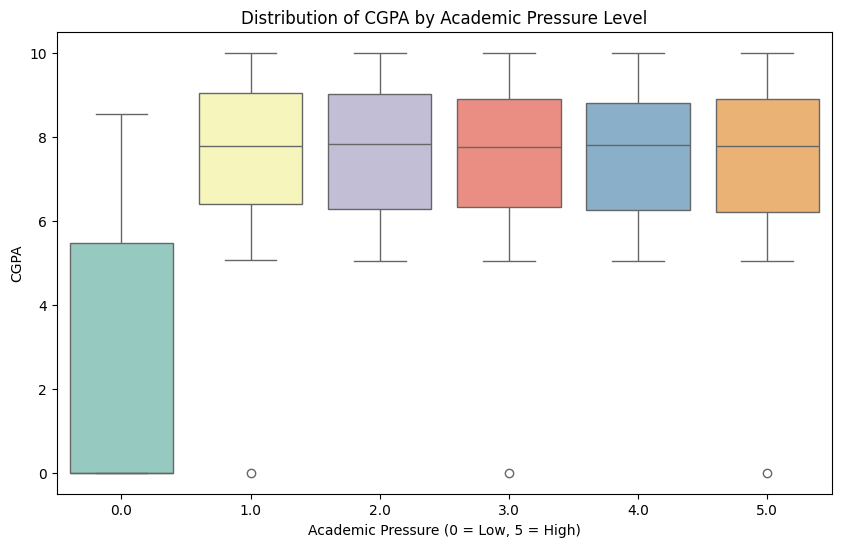

In [44]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Academic Pressure', y='CGPA', palette='Set3')
plt.title('Distribution of CGPA by Academic Pressure Level')
plt.xlabel('Academic Pressure (0 = Low, 5 = High)')
plt.ylabel('CGPA')
plt.show()

- Mức áp lực học tập thấp nhất (0.0):
    - CGPA có giá trị trung bình thấp nhất so với các mức áp lực khác.
    - Phân phối CGPA rất rộng với độ lệch lớn
    - Điều này cho thấy thiếu áp lực học tập có thể dẫn đến sự không ổn định và kết quả học tập kém.
- Mức áp lực từ 1.0 đến 5.0:
    - CGPA ổn định hơn, với độ lệch chuẩn nhỏ hơn so với mức 0.0.
    - Giá trị trung vị CGPA tương đối cao và gần giống nhau ở các mức áp lực này

ANOVA Test cho các mức ta không nhìn rõ trên biểu đồ
- $H_0$: Không có sự khác biệt nào về CGPA giữa các mức độ áp lực học tập
- Alpha = 0.05

In [45]:
groups = [df[df['Academic Pressure'] == i]['CGPA'] for i in range(1, 6)]
anova_result = f_oneway(*groups)
print("ANOVA p-value:", anova_result.pvalue)

ANOVA p-value: 0.0003943327784954734


p-value < 0.05, điều này cho thấy **có sự khác biệt** về CGPA giữa các mức độ áp lực

**Kết luận:**
- Có thể thấy trừ khi sinh viên không có một chút áp lực học tập nào(0.0) thì CGPA mới kém và mất ổn định

- Các áp lực từ 1.0 -> 5.0 kết quả cho thấy không có sự dao động nào quá nhiều, khoảng CGPA cũng gần như tương đồng nhau. 
- Tuy nhiên CGPA giảm nhẹ ở đoạn áp lực từ 1 đến 4

**Kết luận tổng quát:** Nếu muốn tối ưu hiệu suất học tập, một mức độ áp lực học tập vừa phải là lý tưởng. Không cần phải quá đặt nặng áp lực nhưng cũng đừng quá buông lỏng. 

## 8. Sự hài lòng trong học tập và công việc:
- Câu hỏi: Sự hài lòng trong học tập (Study Satisfaction) có ảnh hưởng đến CGPA không?
- Mục đích: Xem xét mối quan hệ giữa mức độ hài lòng cá nhân với hiệu suất và sức khỏe.

In [46]:
study_stats = df.groupby('Study Satisfaction')['CGPA'].agg(['mean', 'std', 'count'])
study_stats

,mean,std,count
Study Satisfaction,,,
0.0,1.717000,2.765735,10
1.0,7.745137,1.451340,5451
2.0,7.728684,1.475230,5838
3.0,7.624382,1.466556,5821
4.0,7.642696,1.449052,6359
5.0,7.525002,1.482607,4422


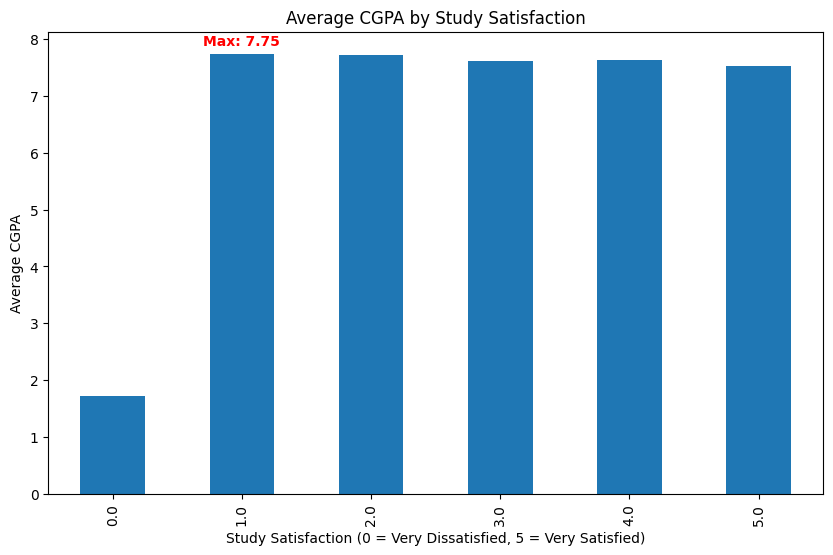

In [47]:
study_stats['mean'].plot(kind='bar', title='Average CGPA by Study Satisfaction', figsize=(10, 6))
plt.ylabel('Average CGPA')
plt.xlabel('Study Satisfaction (0 = Very Dissatisfied, 5 = Very Satisfied)')

# Tìm vị trí của giá trị max
max_idx = study_stats['mean'].idxmax()
max_value = study_stats['mean'].max()

# Thêm nhãn cho cột max
plt.text(x=max_idx, y=max_value + 0.1, s=f'Max: {max_value:.2f}', 
         ha='center', va='bottom', fontsize=10, color='red', fontweight='bold')

plt.show()

Thống kê:
- Mean:
    - Study Satisfaction = 0.0: CGPA rất thấp (1.717).
    - Study Satisfaction từ 1.0 đến 4.0: CGPA trung bình dao động từ 7.62 đến 7.75, với giá trị cao nhất tại mức 1.0 (7.745).
    - Study Satisfaction = 5.0: CGPA trung bình giảm nhẹ xuống 7.525.
- Std:
    - Study Satisfaction = 0.0: Độ lệch chuẩn rất cao (2.765), cho thấy kết quả CGPA của nhóm này không ổn định.
    - Study Satisfaction từ 1.0 đến 5.0: Độ lệch chuẩn dao động từ 1.45 đến 1.48, cho thấy kết quả CGPA của các nhóm này ổn định hơn.

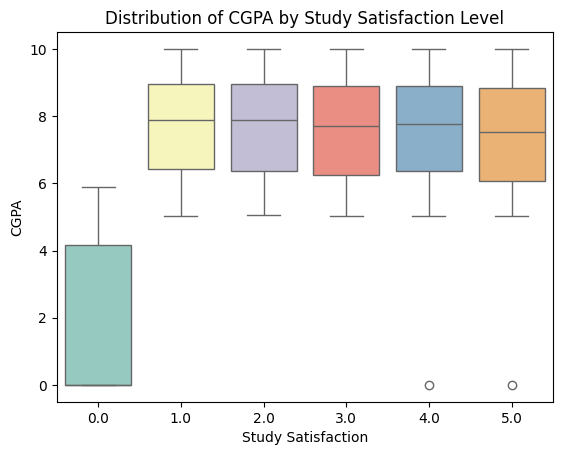

In [48]:
sns.boxplot(data=df, x='Study Satisfaction', y='CGPA', palette='Set3')
plt.title('Distribution of CGPA by Study Satisfaction Level')
plt.xlabel('Study Satisfaction')
plt.ylabel('CGPA')
plt.show()

ANOVA Test cho các mức ta không nhìn rõ trên biểu đồ
- $H_0$: Không có sự khác biệt nào về CGPA giữa các mức độ hài lòng
- Alpha = 0.05

In [49]:
groups = [df[df['Study Satisfaction'] == i]['CGPA'] for i in range(1, 6)]
anova_result = f_oneway(*groups)
print("ANOVA p-value:", anova_result.pvalue)

ANOVA p-value: 5.0654450556722046e-15


p-value nhỏ hơn mức 0.05 rất nhiều, điều này cho thấy **có sự khác biệt**  về CGPA giữa các mức độ hài lòng

**Kết luận**
- Sinh viên có mức độ hài lòng rất thấp (Study Satisfaction = 0) đạt CGPA trung bình rất thấp (1.717), đồng thời kết quả dao động lớn (std = 2.7). Tuy nhiên, số lượng mẫu nhóm này (10) quá ít, cần bổ sung thêm dữ liệu để đưa ra kết luận chắc chắn.

- Sinh viên có mức độ hài lòng thấp (Study Satisfaction = 1) đạt CGPA trung bình cao nhất (7.745). Điều này có thể là do họ chưa hài lòng hoàn toàn với học tập và nghĩ rằng “mình có thể làm tốt hơn”, từ đó thúc đẩy họ cố gắng nhiều hơn, mang lại kết quả cao nhất.

- Ở mức độ hài lòng từ 2 đến 5, CGPA trung bình giảm nhẹ khi mức độ hài lòng tăng. Điều này có thể giải thích rằng khi sinh viên quá hài lòng với học tập, họ có thể lơ là hoặc mất động lực, dẫn đến CGPA không được tốt.

**Kết luận tổng quát:** Mức độ hài lòng thấp vừa phải (Study Satisfaction = 1) có thể đóng vai trò là động lực giúp sinh viên đạt kết quả học tập tốt nhất. Ngược lại, mức hài lòng quá thấp hoặc quá cao đều có ảnh hưởng tiêu cực đến CGPA.

# 5. Modeling

Mục tiêu: dựa vào các đặc điểm trong data, dự đoán xem một học sinh có mắc bệnh trầm cảm hay không (Depression)

## 1. Prepare data for modeling

### Drop features

In [50]:
df.drop(columns=['id'], inplace=True)

In [51]:
df['Depression'].value_counts()

Depression
1    16336
0    11565
Name: count, dtype: int64

Dữ liệu không quá mất cân bằng (khoảng 59%-41%)

In [52]:
df.Profession.value_counts()

Profession
Student                   27870
Architect                     8
Teacher                       6
Digital Marketer              3
Content Writer                2
Chef                          2
Doctor                        2
Pharmacist                    2
Civil Engineer                1
UX/UI Designer                1
Educational Consultant        1
Manager                       1
Lawyer                        1
Entrepreneur                  1
Name: count, dtype: int64

In [53]:
df = df[df['Profession'] == 'Student']
df.drop(columns = ['Profession'], inplace=True)

Chỉ giữ lại nghề nghiệp là học sinh vì các nghề nghiệp khác quá ít

### Encoding

In [54]:
categorical_cols = df.select_dtypes(include=['object']).columns  # Cột phân loại

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])
df.head(5)

,Gender,Age,City,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,1,33.0,51,5.0,0.0,8.97,2.0,0.0,0,0,3,1,3.0,1.0,0,1
1,0,24.0,3,2.0,0.0,5.90,5.0,0.0,0,1,10,0,3.0,2.0,1,0
2,1,31.0,44,3.0,0.0,7.03,5.0,0.0,2,0,5,0,9.0,1.0,1,0
3,0,28.0,49,3.0,0.0,5.59,2.0,0.0,1,1,7,1,4.0,5.0,1,1
4,0,25.0,16,4.0,0.0,8.13,3.0,0.0,0,1,17,1,1.0,1.0,0,0


## 2. Train test split

In [55]:
X = df.drop(columns=['Depression'])
y = df['Depression']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Train set: {X_train.shape} - {y_train.shape}')
print(f'Test set: {X_test.shape} - {y_test.shape}')

Train set: (22296, 15) - (22296,)
Test set: (5574, 15) - (5574,)


## 3. GridSearchCV for Random Forest

In [56]:
param_grid = {
    'n_estimators': [50, 100, 200],             # Số lượng cây
    'max_depth': [10, 20, 30],            # Độ sâu tối đa mỗi cây
    'min_samples_split': [5, 10],               # Số mẫu tối thiểu để chia nhánh
}

rfc = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, 
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Tìm kiếm siêu tham số tốt nhất
grid_search.fit(X_train, y_train)

# In kết quả tốt nhất
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 100}
Best Cross-Validation Score: 0.8428865387380989


## 4. Validation on Test set

In [57]:
model = grid_search.best_estimator_

y_pred = model.predict(X_test)

print("Accuracy on test set:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy on test set: 0.8466092572658773

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.78      0.81      2347
           1       0.85      0.89      0.87      3227

    accuracy                           0.85      5574
   macro avg       0.85      0.84      0.84      5574
weighted avg       0.85      0.85      0.85      5574



Đánh giá mô hình:
- Mô hình hoạt động khá tốt, với độ chính xác (Accuracy) là 85%.
- Lớp 1 có Recall cao hơn (0.89), nghĩa là mô hình nhận diện tốt hơn lớp này (ít bỏ sót hơn).
- Lớp 0 có Recall thấp hơn (0.78), mô hình có xu hướng bỏ sót nhiều hơn với lớp này.